# Intepreting Estimated Coefficients - Understanding the Relationship

## By Jean-Philippe Pitteloud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

### 1. Interpretation and significance

The following model has been proposed to estimate the "annual recreation expenditure" for families in the United States:

𝑒𝑥𝑝𝑒𝑛𝑑𝑖𝑡𝑢𝑟𝑒 = 873 + 0.0012𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒 + 0.00002𝑎𝑛𝑛𝑢𝑎𝑙_𝑖𝑛𝑐𝑜𝑚𝑒2 − 223.57ℎ𝑎𝑣𝑒_𝑘𝑖𝑑𝑠

the **_expenditure_** is the annual spending on recreation in US dollars, **_annual_income_** is the annual income in US dollars, and **_have_kids_** is a dummy variable indicating if the family have children. At first glance, the most valuable additional statistics missing in this question is the p-value associated to each of the estimated coefficients in the equation above. The **p-values** would provide information about the statistical significance of the estimated coefficients and therefore a basis for justifying keeping or removing them from the model. In terms of the interpretation of the values in the equation above, a summary of the findings is provided below:

- The *bias* or constant term was found to be 873. In certain cases, this value can be seen as a baseline value for the target when all other predictors have a value of zero. In cases when categorical variables have been included in the model using dummy variables, the constant holds information about the dummy that has been left out of the model

- The predictor variable _annual_income_ has a "quadratic" influence in the target variable "expenditure", therefore its influence should be observed carefully. For example an increase in \\$1000 of 'annual_income' is expected, based on the model, to increase the value for 'expenditure' by \\$21.2 (1.2 + 20) while keeping the values for all other predictors constant

- Upon creating dummy variables for the original variable, only the variable 'have_kids' was used as predictor for our model having a value of "1" for kids and "0" indicating no kids. The interpretation of the obtain coefficient is established always as a average comparison against the dummy variable not included in the model. For example, an american family with kids is likely to spend, on average, $223.57 less than a family with the same annual income without kids

In order to visualize see the effect of the last variable in the expenditure based on our working model the following plot was created

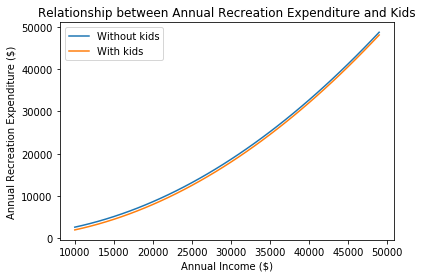

In [2]:
income = np.arange(10000, 50000, 1000)

y_kids = (0.0012 * income) + (0.00002 * (income**2)) + (873 - 223.57)

y_nokids = (0.0012 * income) + (0.00002 * (income**2))

sns.lineplot(x = income, y = y_kids)
sns.lineplot(x = income, y = y_nokids)
plt.title('Relationship between Annual Recreation Expenditure and Kids')
plt.xlabel('Annual Income ($)')
plt.ylabel('Annual Recreation Expenditure ($)')
plt.legend(['Without kids', 'With kids']);

As it can be seen in the plot above, the annual recreational expenditure of an american family without kids is, on average, only slightly higher than that of an identical family with kids

### 2. Weather model

Due to lack of internet connection to access the dataset through a SQL query, the original dataset was stored locally as .csv file and read into a Pandas dataframe as follows

In [3]:
weather_df = pd.read_csv('weather.csv')
weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


As indicated by the assignment, a linear regression model using OLS was estimated using the difference of the variables 'apparenttemperature' and 'temperature' as the target variable, and 'humidity' and 'windspeed' as predictor variables. The summarized results and statistics for the model are presented below

In [4]:
Y = weather_df['apparenttemperature'] - weather_df['temperature']

X = weather_df[['humidity', 'windspeed']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:11:04   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As it can be seen in the table above, the model is only able to explain around 29% of the variance in the target variable, while the selected predictors as well as the introduced constant factor are all statistically significant as indicated by their p-values (<0.05). In terms of the estimated coefficients for each of the predictor variables, it can be inferred that both 'humidity' and 'windspeed' will decrease the difference between the 'apparenttemperature' and the 'temperature'. Specifically, an increase in 'humidity' by one unit will result in a decrease in the temperature difference of 3.0292 units while keeping the 'windspeed' constant. Similarly, an increase in 'windspeed' by one unit, would result in a decrease in the temperature difference of 0.1193 units. These results constrast with the initial expectations of both 'humidity' and 'windspeed' having a positive influence in the difference between 'apparenttemperature' and 'temperature'. For example, with a larger 'humidity' it might be expected that the difference between the apparent and the actual temperature to be larger. A similar behavior might be expected from a higher 'windspeed'

In order to optimize our proposed model, the effect of the interaction between 'humidity' and 'windspeed' in the temperature difference was explored by introducing it as a predictor variable in a new model. This approach is justified, considering that both 'humidity' and 'windspeed' might behave completely independent and in some cases reinforce each other while in other cases antagonize each other. The results and statistics are displayed below

In [5]:
weather_df['humidity_windspeed_inter'] = weather_df.humidity * weather_df.windspeed

Y = weather_df['apparenttemperature'] - weather_df['temperature']

X = weather_df[['humidity','windspeed', 'humidity_windspeed_inter']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:11:04   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0839      0.033      2.511      0.012       0.018       0.149
humidity                     0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                    0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_inter    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

At first glance, our new model is able to explain a larger share of the variance in the target variable (34% vs 29%). In terms of the estimated coefficients, a reversal in the sign of the coefficients estimated for the predictors 'humidity' and 'windspeed' is witnessed. In this new model, both 'humidity' and 'windspeed' are estimated to have a positive effect on the temperature difference as it was initially expected. In terms of the newly created feature accounting for the interaction between the two original predictor variables, it was found to have a negative impact on the target. All included predictor variables were also found to be statistically significant. More details about the coefficients are given below

- An increase in 'humidity' by one unit, is expected to increase the difference between 'apparenttemperature' and 'temperature' by 0.1775 units, while a similar increase in the 'windspeed' variable will increase the temperature difference by 0.09 units. All scenarios while keeping all other variables constant

- In terms of the interaction feature, an increase in one unit of 'humidity' is expected to change the temperature difference by **0.1775 - 0.297 * 'windspeed'**. In this case, the effect of a change in 'humidity' will have a greater effect when 'windspeed' is large compared to when 'windspeed' is small. In the case of a change of 'windspeed' by one unit, it is expected that the target will be affected by **0.09 - 0.297 * 'humidity'**. Once again, the effect of the mentioned change in 'windspeed' in the target value will depend on the value of the 'humidity' under the same conditions 

### 3. House prices model

As done in the previous section, the working dataset was succesfully loaded and read into a Pandas dataframe as follows

In [6]:
house_df = pd.read_csv('house.csv')
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


From the selected predictor variables, dummy variables were created and appended for all chosen categorical variables

In [7]:
house_df = pd.concat([house_df,pd.get_dummies(house_df['exterqual'], prefix = 'exterqual_dummy', drop_first=True)], axis = 1)

house_df = pd.concat([house_df,pd.get_dummies(house_df['kitchenqual'], prefix = 'kitchenqual_dummy', drop_first=True)], axis = 1)

house_df = pd.concat([house_df,pd.get_dummies(house_df['mszoning'], prefix = 'mszoning_dummy', drop_first=True)], axis = 1)

Our initial linear regression model used OLS as estimator and the results and statistics are summarized below

In [8]:
X = house_df[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'totrmsabvgrd', 'exterqual_dummy_Fa', 'exterqual_dummy_Gd', 'exterqual_dummy_TA', 'kitchenqual_dummy_Fa', 'kitchenqual_dummy_Gd', 'kitchenqual_dummy_TA', 'mszoning_dummy_FV', 'mszoning_dummy_RH', 'mszoning_dummy_RL', 'mszoning_dummy_RM']]

Y = house_df['saleprice']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     372.1
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:11:05   Log-Likelihood:                -17389.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1444   BIC:                         3.489e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.949e+04   1.62e+04      1.202      0.229   -1.23e+04    5.13e+04
overallqual           1.776e+04   1192.387     14.892      0.000    1.54e+04    2.01e+04
grlivarea               47.6157      3.904     12.197      0.000      39.958      55.273
garagearea              46.6899      5.828      8.011      0.000      35.258      58.122
firstflrsf              18.1466      3.355      5.409      0.000      11.566      24.727
totrmsabvgrd         -1781.2715   1066.953     -1.669      0.095   -3874.216     311.673
exterqual_dummy_Fa   -4.414e+04    1.3e+04     -3.385      0.001   -6.97e+04   -1.86e+04
exterqual_dummy_Gd   -3.703e+04   6396.874     -5.789      0.000   -4.96e+04   -2.45e+04
exterqual_dummy_TA   -5.053e+04   7057.046     -7.161      0.000   -6.44e+04   -3.67e+04
kitchenqual_dummy_Fa -4.928e+04   8295.990     -5.940      0.000   -6.56e+04    -3.3e+04
kitchenqual_dummy_Gd  -3.72e+04   4776.009     -7.789      0.000   -4.66e+04   -2.78e+04
kitchenqual_dummy_TA -4.685e+04   5349.190     -8.758      0.000   -5.73e+04   -3.64e+04
mszoning_dummy_FV      2.94e+04   1.29e+04      2.276      0.023    4059.231    5.47e+04
mszoning_dummy_RH     2.051e+04   1.48e+04      1.387      0.166   -8499.312    4.95e+04
mszoning_dummy_RL     3.728e+04    1.2e+04      3.106      0.002    1.37e+04    6.08e+04
mszoning_dummy_RM     1.652e+04   1.21e+04      1.362      0.174   -7279.047    4.03e+04
==============================================================================
Omnibus:                      579.026   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67919.197
Skew:                          -0.823   Prob(JB):                         0.00
Kurtosis:                      36.373   Cond. No.                     5.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As it can be seen in the table above, our model is able to explain 79% of the variance in the target variable. However, it estimates that the constant term, and the predictor variables 'totrmsabvgrd', and the dummy variable 'mszoning_dummy_RH', and 'mszoning_dummy_RM' are not statistically significant and should be considered as 'zero coefficient' variables in our model equation. In order to evaluate the effect of removing these variables from the model, a firts modification was done by removing the variable 'totrmsabvgrd'

In [9]:
X = house_df[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'exterqual_dummy_Fa', 'exterqual_dummy_Gd', 'exterqual_dummy_TA', 'kitchenqual_dummy_Fa', 'kitchenqual_dummy_Gd', 'kitchenqual_dummy_TA', 'mszoning_dummy_FV', 'mszoning_dummy_RH', 'mszoning_dummy_RL', 'mszoning_dummy_RM']]

Y = house_df['saleprice']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     398.0
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:11:05   Log-Likelihood:                -17390.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1445   BIC:                         3.489e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.34e+04   1.58e+04      0.848      0.397   -1.76e+04    4.44e+04
overallqual           1.784e+04   1191.975     14.970      0.000    1.55e+04    2.02e+04
grlivarea               42.5695      2.472     17.220      0.000      37.720      47.419
garagearea              46.8522      5.831      8.035      0.000      35.414      58.290
firstflrsf              18.9033      3.326      5.684      0.000      12.379      25.427
exterqual_dummy_Fa   -4.351e+04    1.3e+04     -3.336      0.001   -6.91e+04   -1.79e+04
exterqual_dummy_Gd   -3.636e+04   6388.306     -5.692      0.000   -4.89e+04   -2.38e+04
exterqual_dummy_TA   -5.005e+04   7055.326     -7.093      0.000   -6.39e+04   -3.62e+04
kitchenqual_dummy_Fa -4.894e+04   8298.691     -5.898      0.000   -6.52e+04   -3.27e+04
kitchenqual_dummy_Gd -3.703e+04   4777.888     -7.751      0.000   -4.64e+04   -2.77e+04
kitchenqual_dummy_TA -4.692e+04   5352.308     -8.767      0.000   -5.74e+04   -3.64e+04
mszoning_dummy_FV     3.018e+04   1.29e+04      2.336      0.020    4842.072    5.55e+04
mszoning_dummy_RH     2.006e+04   1.48e+04      1.356      0.175   -8964.750    4.91e+04
mszoning_dummy_RL     3.725e+04    1.2e+04      3.101      0.002    1.37e+04    6.08e+04
mszoning_dummy_RM     1.691e+04   1.21e+04      1.393      0.164   -6895.736    4.07e+04
==============================================================================
Omnibus:                      532.994   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61387.504
Skew:                          -0.664   Prob(JB):                         0.00
Kurtosis:                      34.739   Cond. No.                     5.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A comparison between this new results and the original results suggest negligible changes in the significant of the predictors as well as the performance of the model, so removal of the other non-significant predictors was evaluated as follows

In [10]:
X = house_df[['overallqual', 'grlivarea', 'garagearea', 'firstflrsf', 'exterqual_dummy_Fa', 'exterqual_dummy_Gd', 'exterqual_dummy_TA', 'kitchenqual_dummy_Fa', 'kitchenqual_dummy_Gd', 'kitchenqual_dummy_TA', 'mszoning_dummy_FV', 'mszoning_dummy_RL']]

Y = house_df['saleprice']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     464.1
Date:                Sun, 13 Oct 2019   Prob (F-statistic):               0.00
Time:                        18:11:05   Log-Likelihood:                -17392.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1447   BIC:                         3.488e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.898e+04   1.13e+04      2.575      0.010    6908.277    5.11e+04
overallqual             1.8e+04   1186.449     15.175      0.000    1.57e+04    2.03e+04
grlivarea               42.5568      2.470     17.231      0.000      37.712      47.402
garagearea              46.1209      5.810      7.939      0.000      34.725      57.517
firstflrsf              18.9744      3.325      5.707      0.000      12.452      25.496
exterqual_dummy_Fa     -4.6e+04   1.28e+04     -3.583      0.000   -7.12e+04   -2.08e+04
exterqual_dummy_Gd   -3.625e+04   6388.159     -5.675      0.000   -4.88e+04   -2.37e+04
exterqual_dummy_TA    -4.98e+04   7053.676     -7.060      0.000   -6.36e+04    -3.6e+04
kitchenqual_dummy_Fa -4.884e+04   8297.715     -5.886      0.000   -6.51e+04   -3.26e+04
kitchenqual_dummy_Gd -3.693e+04   4777.508     -7.730      0.000   -4.63e+04   -2.76e+04
kitchenqual_dummy_TA -4.685e+04   5351.733     -8.755      0.000   -5.74e+04   -3.64e+04
mszoning_dummy_FV     1.362e+04   5403.251      2.520      0.012    3016.102    2.42e+04
mszoning_dummy_RL     2.071e+04   2728.337      7.591      0.000    1.54e+04    2.61e+04
==============================================================================
Omnibus:                      532.909   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60863.110
Skew:                          -0.667   Prob(JB):                         0.00
Kurtosis:                      34.602   Cond. No.                     3.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
house_df['mszoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64

The results presented in the summary table above, highlight that the removal of the non-statistically significant predictor variables from our model made the new estimated coefficient for the 'constant' significant while not having any detrimental effect on the ability of the model to explain the variance in the target

From the statistic resulting from our optimized model we can infer the following trends:

- An increase in the variable 'overallqual' by one unit, is expected to increase the 'saleprice' by \\$ 18,000, while keeping all other variables constant

- Other 'numeric' such as 'grlivarea', 'garagearea', and 'firstflrsf' variables were found to have a more modest influence in the target with coefficients of 42.56, 46.12, and 18.97, respectively

- For the categorical variable 'exterqual', as expected, the coefficients for all dummy variable included for this original variable were negative, highlighting the larger influence of the omitted dummy variable 'exterqual_Ex' in the 'saleprice'. Also, a decrease in external quality from Excellent result in a decrease in the target variable 'saleprice'

- A similar behavior was observed for the categorical variable 'kitchenqual', where the omitted dummy variable corresponding to the premium quality for the kitchen had the most influence on the target, on average

- Last, from the three dummy variables preserved for the categorical variable 'mszoning', the dummy variables 'mszoning_dummy_FV' and 'mszoning_dummy_RL' were found to have a positive influence on the sale price, on average, in comparison to the omitted dummy variable 'mszoning_C'. The highest average 'saleprice' correspond to mszoning RL